# Multiple experiments for Quantum Ensemble of swap-test

In [1]:
%matplotlib inline

from Utils import *

create_dir('output')

The directory output  already exists


Generation of random data: each row correstponds to a possible dataset

In [2]:
seed = 123
np.random.seed(seed)

runs = 20
data = pd.DataFrame()

for i in range(runs):
    x1 = uniform(-10,10,2)
    x2 = uniform(-10,10,2)
    x_test = uniform(-10,10,2)

    row = pd.Series(np.concatenate((x1, x2, x_test)))
    data = data.append(row, ignore_index=True)

data.columns = ['x11', 'x12', 'x21', 'x22', 'x1_test', 'x2_test']
# data.to_csv('output/data.csv', index=False)
# data = data.loc[10:20,:]
data.head()

,x11,x12,x21,x22,x1_test,x2_test
0,3.929384,-4.277213,-5.462971,1.026295,4.389379,-1.537871
1,9.615284,3.696595,-0.381362,-2.157650,-3.136440,4.580994
2,-1.228555,-8.806442,-2.039115,4.759908,-6.350165,-6.490965
3,0.631027,0.636552,2.688019,6.988636,4.489106,2.220470
4,4.448868,-3.540822,-2.764227,-5.434735,-4.125719,2.619522


#### Quantum Circuit for the ensemble of quantum swap-test

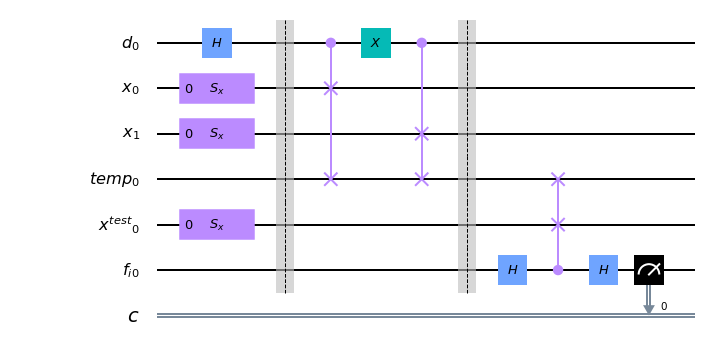

In [3]:
qc = quantum_ensemble(x1, x2, x_test)
qc.draw(output='mpl')

For each row in data are computed the following measures:
 - The ensemble of swap test computed classically (cEnsemble)
 - quantum swap-test using x1 as training point on simulator
 - quantum swap-test using x2 as training point on simulator
 - The average of the results of the two quantum swap-test computed classically (qAVG)
 - The ensemble of swap test computed via quantum simulation (qEnsemble)

In [4]:
data_out = pd.DataFrame()
for index, rows in data.iterrows(): 

    # Extract data
    x1 =np.array([rows.x11, rows.x12])
    x2 =np.array([rows.x21, rows.x21])
    x_test = np.array([rows.x1_test, rows.x2_test])
    
    # Compute the average classically of classical swap test
    cAVG = classic_ensemble(x1, x2, x_test)
    
    # Swap test using x1 as training on simulator
    qc_x1 = quantum_swap_test(x1, x_test)
    m1 = exec_simulator(qc_x1)
    r1 = retrieve_proba(m1)
    
    # Swap test using x2 as training on simulator
    qc_x2 = quantum_swap_test(x2, x_test)
    m2 = exec_simulator(qc_x2)
    r2 = retrieve_proba(m2)
    
    # Compute the average classically
    r_avg = np.mean([r1[0],r2[0]])
    
    # Compute the average using quantum ensemble algorithm on simulator
    qc = quantum_ensemble(x1, x2, x_test)
    r = exec_simulator(qc)
    r_ens = retrieve_proba(r)

    row = [cAVG, r1[0], r2[0], r_avg, r_ens[0]]

    row = pd.Series(row)
    
    data_out = data_out.append(row, ignore_index=True)


In [5]:
data_out.columns = ['cAVG', 'qx1_sim', 'qx2_sim', 'qAVG_sim', 'qEns_sim']
# data_out.to_csv('output/data_out_simulator.csv', index=False)
data_out.head()

,cAVG,qx1_sim,qx2_sim,qAVG_sim,qEns_sim
0,0.741456,0.887939,0.589844,0.738892,0.741089
1,0.521828,0.534180,0.520264,0.527222,0.524536
2,0.911809,0.826782,0.999878,0.913330,0.914062
3,0.948037,0.948975,0.945679,0.947327,0.944946
4,0.759047,0.993164,0.524902,0.759033,0.761475


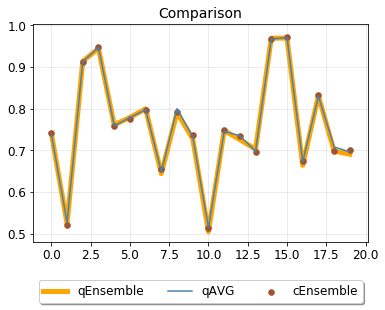

In [6]:
avg = data_out.qAVG_sim
ens = data_out.qEns_sim
clas = data_out.cAVG

plot_multiple_experiments(runs, avg, ens, clas, filename='Simulator')